# Normal AutoEncoder

In [176]:
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
import pandas as pd
from sklearn.utils import shuffle
import tensorflow as tf
import xgboost as xgb
import joblib

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from keras import regularizers

from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
import sklearn


## Data

In [177]:
dataset = pd.read_csv('datasets/Fs_B_O_DANCE_WALK_KIN_0.5sec.csv')

train_dataset = dataset.sample(frac=0.85, random_state=42)
test_dataset = dataset.drop(train_dataset.index)

print("No Training Samples:",train_dataset.shape[0])
print("No Test Samples:",test_dataset.shape[0])

train_dataset = shuffle(train_dataset)
test_dataset = shuffle(test_dataset)

train_emotions = pd.concat([train_dataset.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
test_emotions = pd.concat([test_dataset.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)


train_dataset = np.asarray(train_dataset)
test_dataset = np.asarray(test_dataset)

x_train = train_dataset.reshape((len(train_dataset), np.prod(train_dataset.shape[1:])))
x_test = test_dataset.reshape((len(test_dataset), np.prod(test_dataset.shape[1:])))


input_shape = len(x_train[0])
print(len(x_train[0]))
print(x_train[0])

No Training Samples: 34156
No Test Samples: 6028
27
[ 0.72232987  0.30061069  0.16064123  0.4774625   0.4845825   0.38612505
  0.36032614  0.2732512   0.286151    0.27877452  0.02646106  0.09017496
 -0.0579767   0.98093138  0.22880969  0.12975205  0.19189093  1.32633639
  0.65665843  0.62437681  0.29781023  0.29097236  2.86165708  2.01612318
  1.40164241  1.23672468  0.67214254]


## AutoEncoder

In [178]:
encoding_dim = 3  # 3 floats -> compression of factor 3, assuming the input is 27 floats

### Autoencoder

In [181]:
# This is our input image
input_lma = keras.Input(shape=(input_shape,))

# encoder hidden layers
#encoded = layers.Dense(16, activation='relu')(input_lma)

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='linear')(input_lma)

# decoder hidden layers
#

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(input_shape, activation='linear')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_lma, decoded)

In [182]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_lma, encoded)

encoder.summary()

Model: "model_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_84 (InputLayer)       [(None, 27)]              0         
                                                                 
 dense_198 (Dense)           (None, 3)                 84        
                                                                 
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


In [183]:
# This is our encoded (3-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

## Train

In [184]:
#optimizer=keras.optimizers.Adam(learning_rate=0.01)

In [185]:
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')

In [186]:
autoencoder.fit(x_train, x_train,
                epochs=256,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/256
134/134 [==============================] - 1s 2ms/step - loss: 0.4475 - val_loss: 0.3527
Epoch 2/256
134/134 [==============================] - 0s 1ms/step - loss: 0.2771 - val_loss: 0.2168
Epoch 3/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1858 - val_loss: 0.1673
Epoch 4/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1602 - val_loss: 0.1573
Epoch 5/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1535 - val_loss: 0.1522
Epoch 6/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1484 - val_loss: 0.1469
Epoch 7/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.1419
Epoch 8/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1390 - val_loss: 0.1383
Epoch 9/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1359 - val_loss: 0.1357
Epoch 10/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1334 - val_lo

134/134 [==============================] - 0s 1ms/step - loss: 0.1229 - val_loss: 0.1241
Epoch 82/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1229 - val_loss: 0.1241
Epoch 83/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1229 - val_loss: 0.1240
Epoch 84/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1229 - val_loss: 0.1241
Epoch 85/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1229 - val_loss: 0.1241
Epoch 86/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1229 - val_loss: 0.1240
Epoch 87/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1229 - val_loss: 0.1240
Epoch 88/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1229 - val_loss: 0.1241
Epoch 89/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1229 - val_loss: 0.1240
Epoch 90/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1229 - val_loss: 

Epoch 161/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1123
Epoch 162/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1122
Epoch 163/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1121
Epoch 164/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1121
Epoch 165/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1123
Epoch 166/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1121
Epoch 167/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1122
Epoch 168/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1123
Epoch 169/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1122
Epoch 170/256
134/134 [==============================] - 0s 1ms/step - lo

134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1122
Epoch 241/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1123
Epoch 242/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1122
Epoch 243/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1121
Epoch 244/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1121
Epoch 245/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1122
Epoch 246/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1122
Epoch 247/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1121
Epoch 248/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1121
Epoch 249/256
134/134 [==============================] - 0s 1ms/step - loss: 0.1108 - v

## Test

In [187]:
encoded_lma = encoder.predict(x_test)
decoded_lma = decoder.predict(encoded_lma)

In [188]:
mae_errors = mean_absolute_error(x_test, decoded_lma, multioutput='raw_values')
mse_errors = mean_squared_error(x_test, decoded_lma, multioutput='raw_values')

features = ["max_hand_distance",
          "avg_l_hand_hip_distance",
          "avg_r_hand_hip_distance",
          "max_stride_length",
          "avg_l_hand_chest_distance",
          "avg_r_hand_chest_distance",
          "avg_l_elbow_hip_distance",
          "avg_r_elbow_hip_distance",
          "avg_chest_pelvis_distance",
          "avg_neck_chest_distance",
          "avg_neck_rotation_w", "avg_neck_rotation_x", "avg_neck_rotation_y", "avg_neck_rotation_z",
          "avg_total_body_volume",
          "avg_triangle_area_hands_neck",
          "avg_triangle_area_feet_hips",
          
          "l_hand_speed",
          "r_hand_speed",
          "l_foot_speed",
          "r_foot_speed",
          "neck_speed",
          
          "l_hand_acceleration_magnitude",
          "r_hand_acceleration_magnitude",
          "l_foot_acceleration_magnitude",
          "r_foot_acceleration_magnitude",
          "neck_acceleration_magnitude",
         ]

print("Overall MAE: " + str(mean_absolute_error(x_test, decoded_lma)))

print()
for i in range(len(mse_errors)):
    print("==" + features[i] + "==")
    print("MSE: %.5f" % mse_errors[i])
    print("MAE: %.5f" % mae_errors[i])
    print("Example [Regen-Real]: " + str(decoded_lma[i][i]) + " - " + str(x_test[i][i]))
    print()

Overall MAE: 0.11216055254290137

==max_hand_distance==
MSE: 0.05904
MAE: 0.18504
Example [Regen-Real]: 0.82505417 - 0.929101907127794

==avg_l_hand_hip_distance==
MSE: 0.02032
MAE: 0.09991
Example [Regen-Real]: 0.31383598 - 0.2535057311716078

==avg_r_hand_hip_distance==
MSE: 0.02542
MAE: 0.11462
Example [Regen-Real]: 0.28390628 - 0.4177505150421182

==max_stride_length==
MSE: 0.01852
MAE: 0.10421
Example [Regen-Real]: 0.38347363 - 0.2908147405567133

==avg_l_hand_chest_distance==
MSE: 0.01218
MAE: 0.07874
Example [Regen-Real]: 0.43659183 - 0.4780160302373418

==avg_r_hand_chest_distance==
MSE: 0.01200
MAE: 0.07863
Example [Regen-Real]: 0.44391075 - 0.4492174838083996

==avg_l_elbow_hip_distance==
MSE: 0.00526
MAE: 0.05239
Example [Regen-Real]: 0.3353094 - 0.186527500483171

==avg_r_elbow_hip_distance==
MSE: 0.00553
MAE: 0.05415
Example [Regen-Real]: 0.34446156 - 0.2624691504303338

==avg_chest_pelvis_distance==
MSE: 0.00000
MAE: 0.00037
Example [Regen-Real]: 0.28633714 - 0.2861509999

In [189]:
model_p = xgb.XGBRegressor(verbosity=0)
model_p.load_model("../../emotion_classifier/model_training/models/l2p_dance_model_O.json")

model_a = xgb.XGBRegressor(verbosity=0)
model_a.load_model("../../emotion_classifier/model_training/models/l2a_dance_model_O.json")

model_d = xgb.XGBRegressor(verbosity=0)
model_d.load_model("../../emotion_classifier/model_training/models/l2d_dance_model_O.json")

scaler = joblib.load('../../emotion_classifier/model_training/datasets/scalers/standardizers/Fs_B_O_S_DANCE_WALK_KIN_0.5sec.pkl') 

In [209]:
sample = np.asarray(x_test[1])
sample = sample.reshape(1,-1)
print(sample)

[[ 0.48787081  0.25350573  0.26362314  0.28867775  0.46451875  0.46793826
   0.34736974  0.3513925   0.286151    0.27886443  0.03283048 -0.18807481
  -0.01528917  0.98136552  0.11219     0.15637932  0.12656324  0.34512916
   0.21659343  0.21783337  0.18811772  0.28809448  1.68458422  0.12708601
   0.25069947  0.49993658  0.44727669]]


In [210]:
generated = encoder.predict(sample)
print(generated)

[[-0.5224355  -0.8290596   0.05003154]]


In [211]:
regen = decoder.predict(generated)
print(regen)

[[ 0.48628756  0.31383598  0.27678993  0.3235078   0.44406185  0.44796878
   0.3380221   0.33729854  0.28648007  0.27869436  0.00637171 -0.12865256
  -0.04899131  0.98284596  0.23394868  0.12174594  0.13326922  0.45180503
   0.13425937  0.14767751  0.16074066  0.15782107  1.6859633   0.12582749
   0.42136034  0.43196467  0.3978675 ]]


In [193]:
scaled_sample = scaler.transform(sample)

real_coordinates = (
    model_p.predict(scaled_sample),
    model_a.predict(scaled_sample),
    model_d.predict(scaled_sample)
)

scaled_regen = scaler.transform(regen)

generated_coordinates = (
    model_p.predict(scaled_regen),
    model_a.predict(scaled_regen),
    model_d.predict(scaled_regen)
)


print('Real: %s' % [real_coordinates[0][0], real_coordinates[1][0], real_coordinates[2][0]])
print('Predicted: %s' % [generated_coordinates[0][0], generated_coordinates[1][0], generated_coordinates[2][0]])

Real: [0.6967598, 0.19890438, 0.19639012]
Predicted: [-0.14929478, 0.34988973, 0.1258584]


/home/diogosilva/.local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/home/diogosilva/.local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


<Figure size 432x432 with 0 Axes>

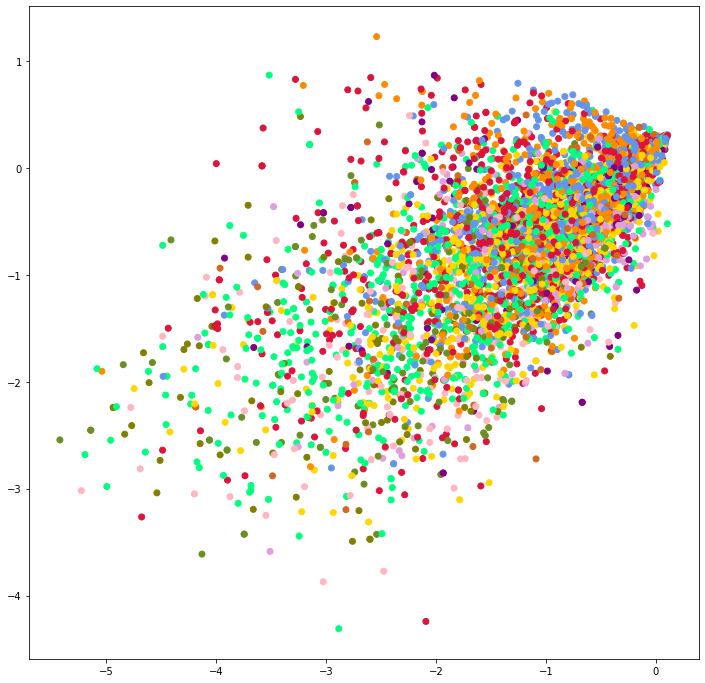

In [194]:
conv_dict = {
    (-0.5, 0.6, 0.9): "angry",
    (0.6, 0.5, 0.2): "happy",
    (-0.6, -0.3, -0.3): "sad",
    (-0.4, 0.25, -0.1): "disgusted",
    (-0.35, 0.7, -0.8): "afraid",
    (0.7, 0.2, 0.2): "pleased",
    (-0.5, -0.7, -0.25): "bored",
    (0.1, -0.7, -0.2): "tired",
    (0.6, -0.55, 0.1): "relaxed",
    (0.5, 0.7, 0.4): "excited",
    (-0.85, -0.1, -0.8): "miserable",
    (-0.3, -0.66, -0.7): "nervous",
    (0.9, -0.25, 0.65): "satisfied",   
}

colour_dict = {
    "angry": "crimson",
    "happy": "springgreen",
    "sad": "cornflowerblue",
    "disgusted": "darkorange"  ,
    "afraid": "gold",
    "pleased": "olive",
    "bored": "lightseagreen",
    "tired": "plum",
    "relaxed": "chocolate",
    "excited": "olivedrab",
    "miserable": "purple",
    "nervous": "lightslategray",
    "satisfied": "lightpink",   
}

x_test_encoded = encoder.predict(x_test, batch_size=32)
plt.figure(figsize=(6, 6))
test_y = []
for i in range(len(test_emotions)):
    point_coords = (test_emotions.iloc[i][0], test_emotions.iloc[i][1], test_emotions.iloc[i][2])
    
    test_y.append(colour_dict[conv_dict[point_coords]])

plt.figure(figsize=(12, 12))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=test_y)
plt.show()

## PAD to Latent Space

In [ ]:
model_p = xgb.XGBRegressor(verbosity=0)
model_p.load_model("../../emotion_classifier/model_training/models/l2p_dance_model_O.json")

model_a = xgb.XGBRegressor(verbosity=0)
model_a.load_model("../../emotion_classifier/model_training/models/l2a_dance_model_O.json")

model_d = xgb.XGBRegressor(verbosity=0)
model_d.load_model("../../emotion_classifier/model_training/models/l2d_dance_model_O.json")

scaler = joblib.load('../../emotion_classifier/model_training/datasets/scalers/standardizers/Fs_B_O_S_DANCE_WALK_KIN_0.5sec.pkl') 

## Dataset

In [195]:
# X -> Predicted emotions of LMA features
# y -> Latent Space of LMA features
# Good Error: Predicted emotion of LMA features generated from latent space == Predicted emotions of original LMA features

dataset = pd.read_csv('../../emotion_classifier/model_training/datasets/Fs_B_O_S_DANCE_WALK_KIN_0.5sec.csv')

train_dataset = dataset.sample(frac=0.85, random_state=42)
test_dataset = dataset.drop(train_dataset.index)

print("No Training Samples:",train_dataset.shape[0])
print("No Test Samples:",test_dataset.shape[0])

train_lma = train_dataset.copy()
test_lma = test_dataset.copy()

train_emotions = pd.concat([train_lma.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
test_emotions = pd.concat([test_lma.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)

No Training Samples: 34156
No Test Samples: 6028


In [196]:
train_X_p = model_p.predict(train_lma)
train_X_a = model_a.predict(train_lma)
train_X_d = model_d.predict(train_lma)

rows = []
for i in range(len(train_lma)):
    rows.append([train_X_p[i], train_X_a[i], train_X_d[i]])

train_X = pd.DataFrame(rows, columns=[
            "EMOTION_P", "EMOTION_A", "EMOTION_D"
         ])

train_X.head()

,EMOTION_P,EMOTION_A,EMOTION_D
0,0.596379,0.498261,0.199826
1,0.699091,0.199438,0.199085
2,-0.586425,-0.288315,-0.289255
3,-0.350705,0.698464,-0.799689
4,-0.351387,0.699263,-0.800516


In [197]:
test_X_p = model_p.predict(test_lma)
test_X_a = model_a.predict(test_lma)
test_X_d = model_d.predict(test_lma)

rows = []
for i in range(len(test_lma)):
    rows.append([test_X_p[i], test_X_a[i], test_X_d[i]])

test_X = pd.DataFrame(rows, columns=[
            "EMOTION_P", "EMOTION_A", "EMOTION_D"
         ])

test_X.head()

,EMOTION_P,EMOTION_A,EMOTION_D
0,-0.499540,0.599887,0.896598
1,0.599478,0.496702,0.201141
2,-0.581306,-0.292542,-0.287728
3,-0.602087,-0.301238,-0.288370
4,-0.595353,-0.301161,-0.302442


In [198]:
latent_space = encoder.predict(train_lma)

rows = []
for i in range(len(latent_space)):
    rows.append([latent_space[i][0], latent_space[i][1], latent_space[i][2]])
    
train_y = pd.DataFrame(rows, columns=[
            "LATENT_1", "LATENT_2" , "LATENT_3"
         ])

train_y_1 = pd.concat([train_y.pop(x) for x in ['LATENT_1']], axis=1)
train_y_2 = pd.concat([train_y.pop(x) for x in ['LATENT_2']], axis=1)
train_y_3 = pd.concat([train_y.pop(x) for x in ['LATENT_3']], axis=1)

train_y_1.head()

,LATENT_1
0,-0.560463
1,-0.601831
2,-0.073618
3,0.277633
4,0.497584


In [199]:
latent_space = encoder.predict(test_lma)

rows = []
for i in range(len(latent_space)):
    rows.append([latent_space[i][0], latent_space[i][1], latent_space[i][2]])
    
test_y = pd.DataFrame(rows, columns=[
            "LATENT_1", "LATENT_2" , "LATENT_3"
         ])

test_y_1 = pd.concat([test_y.pop(x) for x in ['LATENT_1']], axis=1)
test_y_2 = pd.concat([test_y.pop(x) for x in ['LATENT_2']], axis=1)
test_y_3 = pd.concat([test_y.pop(x) for x in ['LATENT_3']], axis=1)

test_y_1.head()

,LATENT_1
0,-0.321843
1,-0.551823
2,-0.372836
3,0.721044
4,-0.707600


## Train Regressor

In [200]:
model_1 = xgb.XGBRegressor(
                    n_estimators=1500, learning_rate=0.1, max_depth=15, min_child_weight=1, 
                    reg_alpha=0.25, reg_lambda=1.25, gamma=0.001,
                    subsample=0.75, colsample_bytree=1.0, objective="reg:squarederror",
                    tree_method='gpu_hist'
                )


model_2 = xgb.XGBRegressor(
                    n_estimators=1500, learning_rate=0.05, max_depth=15, min_child_weight=1, 
                    reg_alpha=0, reg_lambda=1.25, gamma=0.001,
                    subsample=0.75, colsample_bytree=1.0, objective="reg:squarederror",
                    tree_method='gpu_hist'
                )


model_3 = xgb.XGBRegressor(
                    n_estimators=1500, learning_rate=0.05, max_depth=15, min_child_weight=1, 
                    reg_alpha=0.0, reg_lambda=1, gamma=0.0,
                    subsample=0.75, colsample_bytree=1.0, objective="reg:squarederror",
                    tree_method='gpu_hist'
                )


In [201]:
model_1.fit(train_X, train_y_1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, enable_categorical=False,
             gamma=0.001, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.25, reg_lambda=1.25, scale_pos_weight=1,
             subsample=0.75, tree_method='gpu_hist', validate_parameters=1,
             verbosity=None)

In [202]:
model_2.fit(train_X, train_y_2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, enable_categorical=False,
             gamma=0.001, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1.25, scale_pos_weight=1, subsample=0.75,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [203]:
model_3.fit(train_X, train_y_3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, enable_categorical=False,
             gamma=0.0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [204]:
score = model_1.score(train_X, train_y_1)  

print("Latent 1")
print("Training score: ", score)

print()

score = model_2.score(train_X, train_y_2)  

print("Latent 2")
print("Training score: ", score)

score = model_3.score(train_X, train_y_3)  

print()

print("Latent 3")
print("Training score: ", score)

Latent 1
Training score:  0.9136323518306076

Latent 2
Training score:  0.9111054387198183

Latent 3
Training score:  0.9244215932393954


In [205]:
pred_y_1 = model_1.predict(test_X)
mse = mean_squared_error(test_y_1, pred_y_1)
mae = mean_absolute_error(test_y_1, pred_y_1)
print("Latent 1")
print("MSE: %.2f" % mse)
print("MAE: %.2f" % mae)


pred_y_2 = model_2.predict(test_X)
mse = mean_squared_error(test_y_2, pred_y_2)
mae = mean_absolute_error(test_y_2, pred_y_2)
print("\nLatent 2")
print("MSE: %.2f" % mse)
print("MAE: %.2f" % mae)


pred_y_3 = model_3.predict(test_X)
mse = mean_squared_error(test_y_3, pred_y_3)
mae = mean_absolute_error(test_y_3, pred_y_3)
print("\nLatent 3")
print("MSE: %.2f" % mse)
print("MAE: %.2f" % mae)

Latent 1
MSE: 0.17
MAE: 0.22

Latent 2
MSE: 0.24
MAE: 0.26

Latent 3
MSE: 0.71
MAE: 0.44


In [ ]:
index = 3

# Real -> PAD coordinates
#   - get latent space
#   - convert from latent to LMA features
#   - standardize
#   - predict coordinates of generated features

sample = np.asarray([test_X.iloc[index]])
latent = np.asarray([[model_1.predict(sample)[0], model_2.predict(sample)[0], model_3.predict(sample)[0]]])


generated_lma = decoder.predict(latent)


scaled_gen = scaler.transform(generated_lma)

generated_coord = (
    model_p.predict(scaled_gen)[0],
    model_a.predict(scaled_gen)[0],
    model_d.predict(scaled_gen)[0]
)

print('Real: %s' % sample[0])
print('Predicted: %s' % np.asarray(generated_coord))

## RandomSearchCV

In [ ]:
# A parameter grid for XGBoost
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
params = {
        'eta': [0.01, 0.05, 0.1],
        'min_child_weight': [1, 5, 11, 21],
        'max_depth': [3, 6, 10, 15],
        'gamma': [0, 0.001, 0.01],
        'subsample': [0.75, 1],
        'colsample_bytree': [0.75, 1],
        'lambda': [1, 1.25],
        'alpha': [0.0, 0.25]
        }

n_iter = 150

In [ ]:
model_1 = xgb.XGBRegressor(
                    n_estimators=1500,
                    objective="reg:squarederror",
                    tree_method='gpu_hist'
                )

model_2 = xgb.XGBRegressor(
                    n_estimators=1500,
                    objective="reg:squarederror",
                    tree_method='gpu_hist'
                )

In [ ]:
# Latent 1
# run randomized search
kfold = KFold(n_splits=5, shuffle=True)

random_search_1 = RandomizedSearchCV(model_1, param_distributions=params,
                               cv=kfold, scoring='neg_mean_squared_error', n_iter = n_iter)

start = time.time()
random_search_1.fit(train_X, train_y_1)


print("GridSearchCV took %.2f seconds"
      " parameter settings." % ((time.time() - start)))

In [ ]:
# Latent 2
# run randomized search
kfold = KFold(n_splits=5, shuffle=True)

random_search_2 = RandomizedSearchCV(model_2, param_distributions=params,
                               cv=kfold, scoring='neg_mean_squared_error', n_iter = n_iter)

start = time.time()
random_search_2.fit(train_X, train_y_2)


print("GridSearchCV took %.2f seconds"
      " parameter settings." % ((time.time() - start)))

In [ ]:
# Latent 3
# run randomized search
kfold = KFold(n_splits=5, shuffle=True)

random_search_3 = RandomizedSearchCV(model_3, param_distributions=params,
                               cv=kfold, scoring='neg_mean_squared_error', n_iter = n_iter)

start = time.time()
random_search_3.fit(train_X, train_y_3)


print("GridSearchCV took %.2f seconds"
      " parameter settings." % ((time.time() - start)))

### Results

In [ ]:
best_regressor_1 = random_search_1.best_estimator_

print(best_regressor_1.get_params())

In [ ]:
best_regressor_2 = random_search_2.best_estimator_

print(best_regressor_2.get_params())

In [ ]:
best_regressor_3 = random_search_3.best_estimator_

print(best_regressor_3.get_params())

In [ ]:
pred_y_1 = best_regressor_1.predict(test_X)
mse = mean_squared_error(test_y_1, pred_y_1)
mae = mean_absolute_error(test_y_1, pred_y_1)
print("Latent 1")
print("MSE: %.2f" % mse)
print("MAE: %.2f" % mae)


pred_y_2 = best_regressor_2.predict(test_X)
mse = mean_squared_error(test_y_2, pred_y_2)
mae = mean_absolute_error(test_y_2, pred_y_2)
print("\nLatent 2")
print("MSE: %.2f" % mse)
print("MAE: %.2f" % mae)

pred_y_3 = best_regressor_3.predict(test_X)
mse = mean_squared_error(test_y_3, pred_y_3)
mae = mean_absolute_error(test_y_3, pred_y_3)
print("\nLatent 3")
print("MSE: %.2f" % mse)
print("MAE: %.2f" % mae)